In [1]:
import numpy as np
import pylab as plt
import scipy.stats

import sklearn
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
np.random.seed(10)

Load the dataset

In [3]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


#### Visualize some random 100 digits

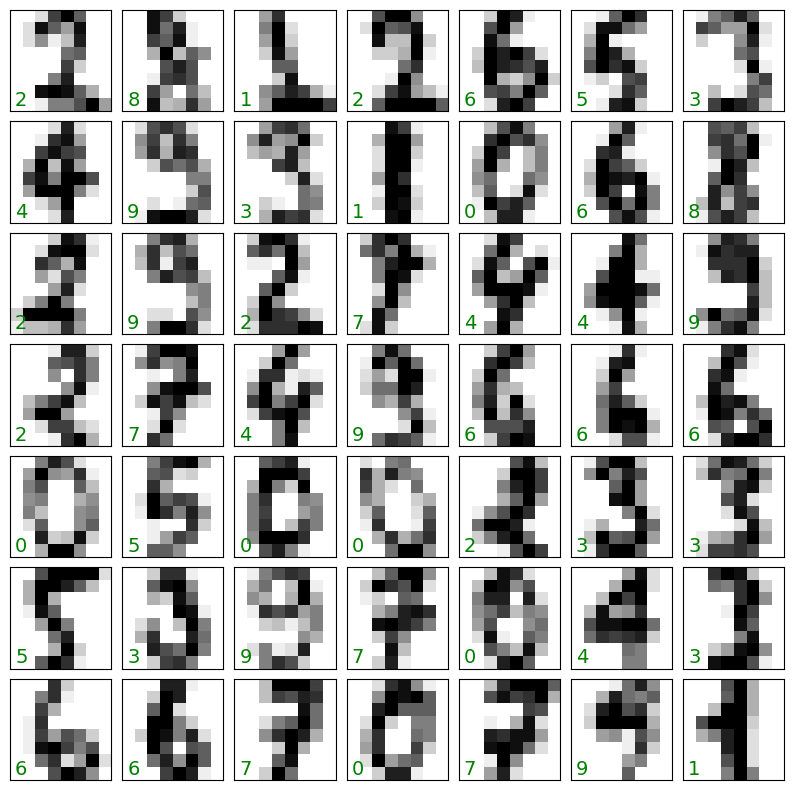

In [4]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

mychoices = np.random.choice(digits.images.shape[0],100)
#mychoices = np.arange(0,100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

### Part 1: dimentionality reduction (unsupervised)

In [5]:
model = Isomap(n_components=2)
digits_transformed = model.fit_transform(digits.data)
print(digits_transformed.shape)

labels = digits.target

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


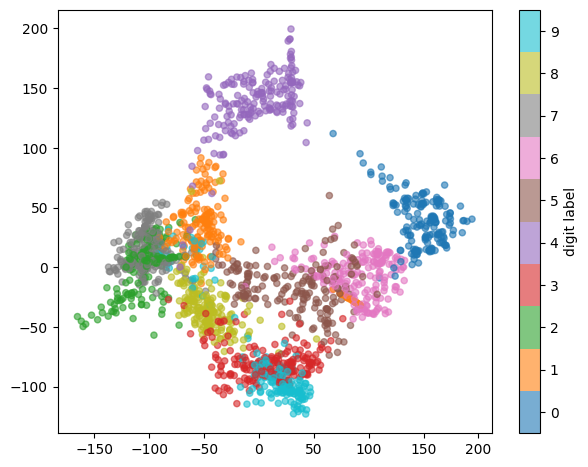

In [6]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(plt.cm.tab10.colors)

plt.figure(figsize=(7,5.5))

scatter = plt.scatter(digits_transformed[:,0], digits_transformed[:,1], c=labels, cmap=cmap, alpha=0.6, s=20)
plt.colorbar(label='digit label', ticks=np.arange(10))
plt.clim(-0.5, 9.5)
plt.show()

### Part 2: classification (supervised)

Split the dataset in train and test set, using "train_test_split"

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, labels, test_size=0.2)
print(X_train.shape, X_test.shape)

(1437, 64) (360, 64)


Classification using "LogisticRegression"

In [8]:
clf_model = LogisticRegression(max_iter=2000, solver='sag',penalty='l2')
clf_model.fit(X_train, y_train)

y_pred = clf_model.predict(X_test)
y_train_pred = clf_model.predict(X_train)

Compute the accuracy score

In [9]:
acc_pred = sklearn.metrics.accuracy_score(y_test,y_pred)
acc_train_pred = sklearn.metrics.accuracy_score(y_train,y_train_pred)

print('Accuracy score for validation set: ' + str(acc_pred))
print('Accuracy score for training set: ' + str(acc_train_pred))

Accuracy score for validation set: 0.9638888888888889
Accuracy score for training set: 1.0


The accuracy score for the training set is 1, as expected, since this is the set the model was trained on. 
The score decreases slightly for the validation set. This is likely because the model might be struggling 
to generalize to unseen data, leading to some misclassifications of certain digits. Let's see which digits 
are more difficult to classify correctly.

In [10]:
print(confusion_matrix(y_test,y_pred))

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  3  0  0  0  0]
 [ 0  0  0  0 29  0  0  0  0  1]
 [ 0  1  0  0  0 32  0  1  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  3  0  0  0  0  0  0 29  0]
 [ 0  1  0  0  0  0  0  0  1 36]]


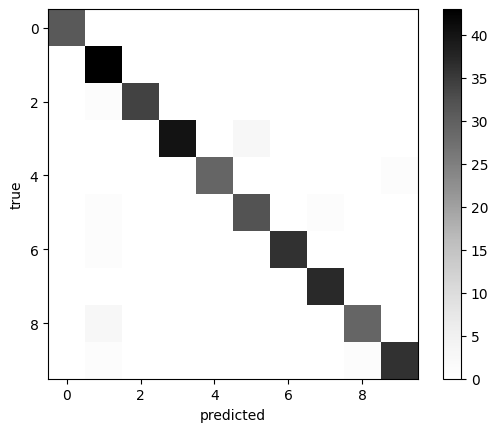

In [11]:
plt.imshow(confusion_matrix(y_test, y_pred), cmap='Grays')
plt.colorbar()
plt.ylabel('true')
plt.xlabel('predicted')
plt.show()

# !!! Comment

What are the digits that are more challenging to identify, does it make sense?
